In [ ]:
# soon I will be uploading timeseries Sarimax model with trend and sesasonality in the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
stores = pd.read_csv('C:/Users/tejan/Desktop/Data Analystics/class work/Case Study/2. Walmart Store Sales Forecasting/data/stores.csv')

train = pd.read_csv('C:/Users/tejan/Desktop/Data Analystics/class work/Case Study/2. Walmart Store Sales Forecasting/data/train.csv')

test = pd.read_csv('C:/Users/tejan/Desktop/Data Analystics/class work/Case Study/2. Walmart Store Sales Forecasting/data/test.csv')

features = pd.read_csv('C:/Users/tejan/Desktop/Data Analystics/class work/Case Study/2. Walmart Store Sales Forecasting/data/features.csv')


In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [25]:
stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [28]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [19]:
train_new =  pd.merge( stores, train, on = 'Store', how = 'outer')
train_new.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,2010-02-05,24924.50,False
1,1,A,151315,1,2010-02-12,46039.49,True
2,1,A,151315,1,2010-02-19,41595.55,False
3,1,A,151315,1,2010-02-26,19403.54,False
4,1,A,151315,1,2010-03-05,21827.90,False


In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [34]:
train = pd.merge(train_new, features, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

In [35]:
train.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     421570 non-null  bool   
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [38]:
# Merging Test dataset
test_1=pd.merge(test, stores, on = 'Store', how = 'outer')
test=pd.merge(test_1, features, on=["Store","Date",'IsHoliday'], how = 'left')
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [41]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [43]:
train.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,B,118221,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,B,118221,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,B,118221,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,B,118221,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667
421569,45,B,118221,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


In [ ]:
# splitting test and train data set 

In [44]:
###Train Numerical Data
train_num=train.select_dtypes(include=['float64', 'float32','int32','int64'])

###Train Categorical Data
train_cat = train.select_dtypes(include=['object', 'O'])

In [140]:
test.isnull().any()

Store           False
Dept            False
Date            False
IsHoliday       False
Type            False
Size            False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
dtype: bool

In [70]:
train = train.fillna(0)
test = test.fillna(0)

In [173]:
train.describe(percentiles=[.01, .10,.25, .50, .75, .90, .95, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Store,421570.0,22.200546,12.785297,1.000000,1.000000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Size,421570.0,136727.915739,60980.583328,34875.000000,34875.000000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Dept,421570.0,44.260317,30.492054,1.000000,1.000000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940000,5.000000,291.097000,2079.650000,7612.030000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
IsHoliday,421570.0,0.070358,0.255750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
Temperature,421570.0,15.605588,10.248851,-18.922222,-7.611111,1.100000,8.155556,16.716667,23.488889,28.655556,30.705556,33.783333,37.855556
Fuel_Price,421570.0,3.361027,0.458515,2.472000,2.565000,2.720000,2.933000,3.452000,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000000,0.000000,0.000000,0.000000,0.000000,2809.050000,8624.560000,12407.710000,28177.290000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760000,0.000000,0.000000,0.000000,0.000000,2.200000,452.880000,3789.560000,21813.160000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100000,0.000000,0.000000,0.000000,0.000000,4.540000,74.410000,216.170000,2083.280000,141630.610000


In [50]:
###Test Numerical Data
test_num=test.select_dtypes(include=['float64', 'float32','int32','int64'])

###Test Categorical Data
test_cat = test.select_dtypes(include=['object', 'O'])

In [51]:
test_num.describe(percentiles=[.01, .10,.25, .50, .75, .90, .95, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Store,115064.0,22.238207,12.809930,1.000000,1.000000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,115064.0,44.339524,30.656410,1.000000,1.000000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Size,115064.0,136497.688921,61106.926438,34875.000000,34875.000000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,115064.0,53.941804,18.724153,-7.290000,11.440000,29.970000,39.820000,54.470000,67.350000,79.480000,83.820000,92.140000,101.950000
Fuel_Price,115064.0,3.581546,0.239442,2.872000,2.957000,3.227000,3.431000,3.606000,3.766000,3.866000,3.951000,4.079000,4.125000
MarkDown1,114915.0,7689.216439,10698.760716,-2781.450000,20.840000,457.660000,1966.460000,4842.290000,9439.140000,15325.040000,23140.880000,65757.570000,103184.980000
MarkDown2,86437.0,3734.051729,8323.495014,-35.740000,0.020000,25.770000,180.350000,742.590000,2735.670000,9277.290000,22671.670000,42920.210000,71074.170000
MarkDown3,105235.0,2403.088666,13767.939313,-179.260000,0.150000,3.100000,15.100000,78.260000,272.580000,698.930000,2361.570000,86476.660000,149483.310000
MarkDown4,102176.0,3356.219071,7570.501545,0.220000,2.610000,37.360000,155.460000,840.940000,3096.920000,7674.410000,14191.010000,44739.280000,65344.640000
MarkDown5,115064.0,3922.681189,19445.150745,-185.170000,269.300000,770.883000,1309.300000,2390.430000,4227.270000,6966.340000,9316.710000,18599.300000,771448.100000


<AxesSubplot:>

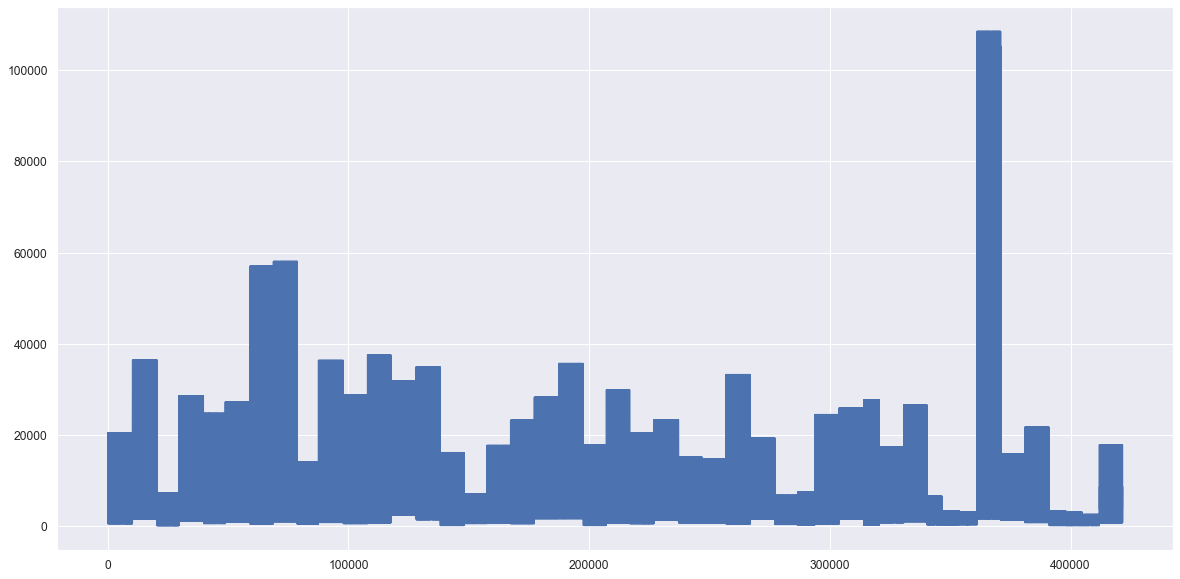

In [73]:
train_num.MarkDown5.plot()

In [58]:
# markedown5 is hughly skewed

In [59]:
train_num.corr()

,Store,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,-0.182881,0.024004,-0.085195,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Size,-0.182881,1.000000,-0.002966,0.243828,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Dept,0.024004,-0.002966,1.000000,0.148032,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.243828,0.148032,1.000000,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
Temperature,-0.050097,-0.058313,0.004437,-0.002312,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003361,0.003572,-0.000120,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,0.345673,-0.002426,0.085251,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.108827,0.000290,0.024130,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.048913,0.001784,0.060385,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818
MarkDown4,-0.009941,0.168196,0.004257,0.045414,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963


<AxesSubplot:>

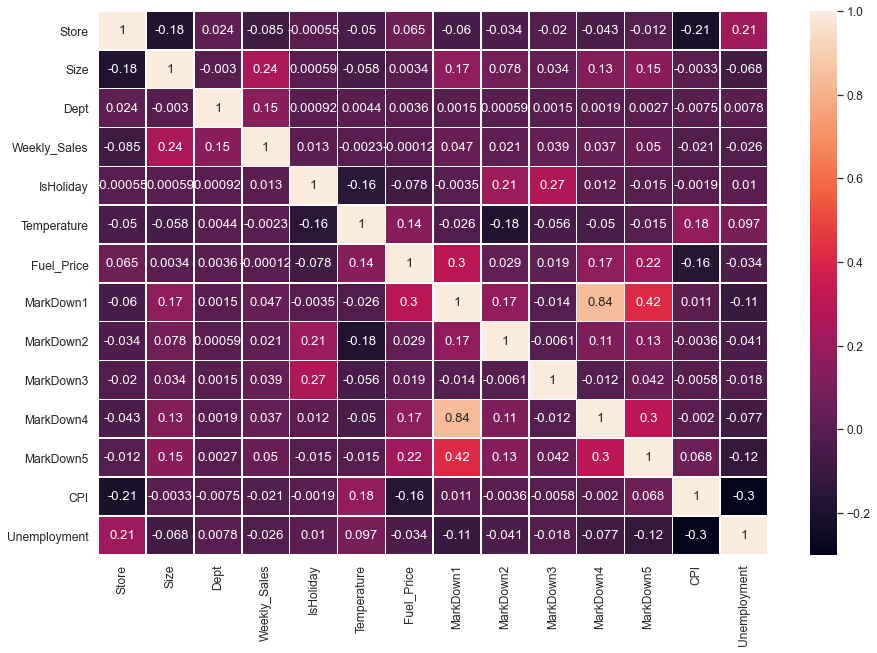

In [74]:

sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.1)
sns.heatmap(train.corr(),linewidths=0.5,annot=True)

In [ ]:
#Markdown 1 and 4 is high;y correlated
# markdown 5 is skewed

In [75]:
train.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


<AxesSubplot:>

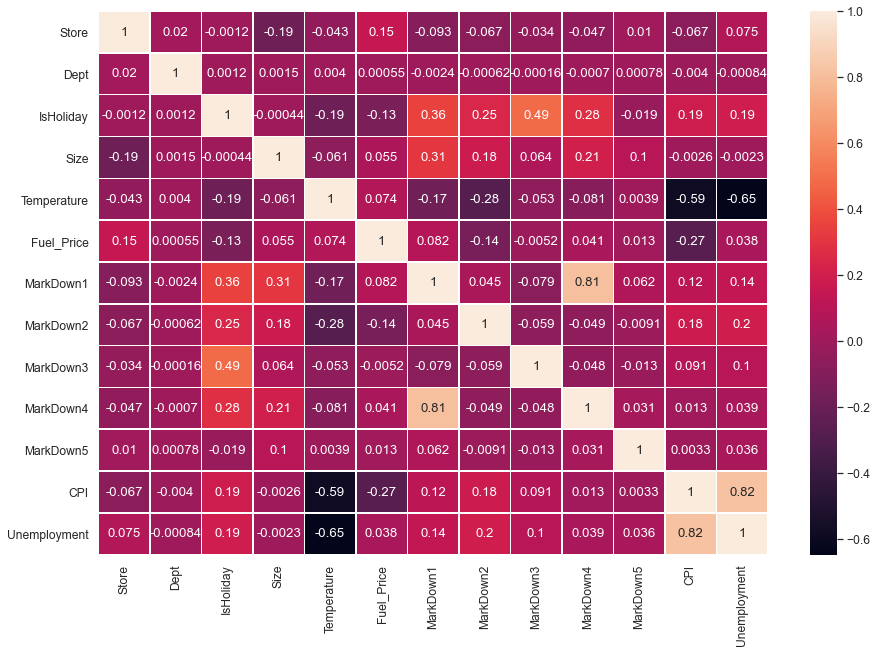

In [76]:

sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.1)
sns.heatmap(test.corr(),linewidths=0.5,annot=True)

In [77]:
# ===============================================================

# some exploratory analysis on the data

In [78]:
train.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


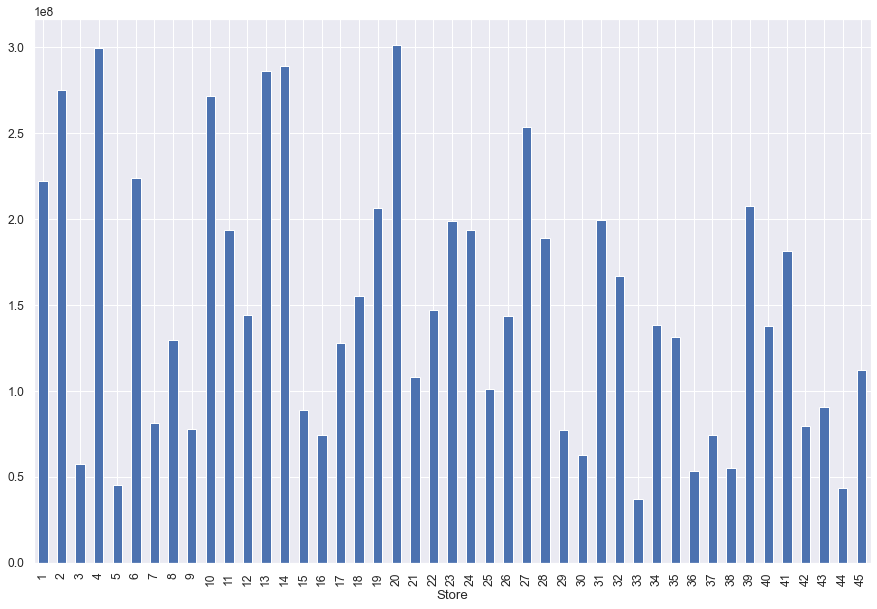

In [104]:
# weekly sales by store
x = train.groupby('Store')['Weekly_Sales'].sum().plot(kind = 'bar')
# x.sort_values('Weekly_Sales', ascending = False)

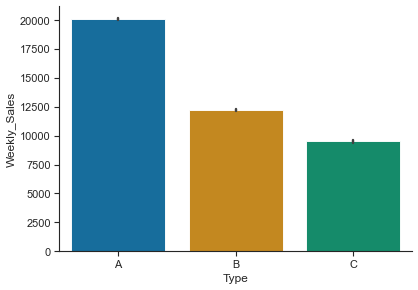

In [122]:
# weekly sales by type
plt.figure(figsize=(7,5),dpi=65)
sns.set_style('ticks')
sns.barplot(y=train["Weekly_Sales"],x=train["Type"],palette='colorblind')
sns.despine()

<AxesSubplot:>

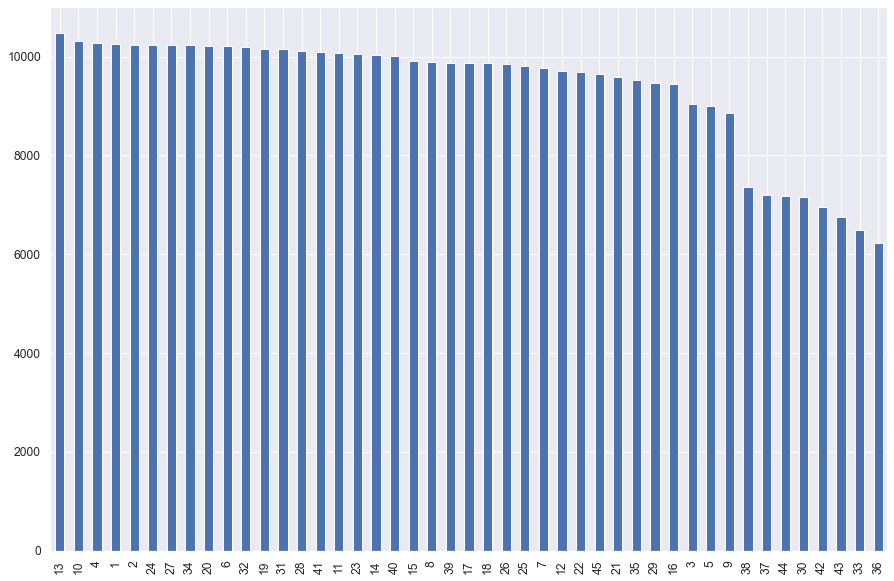

In [105]:
train.Store.value_counts().plot(kind = 'bar')

<AxesSubplot:>

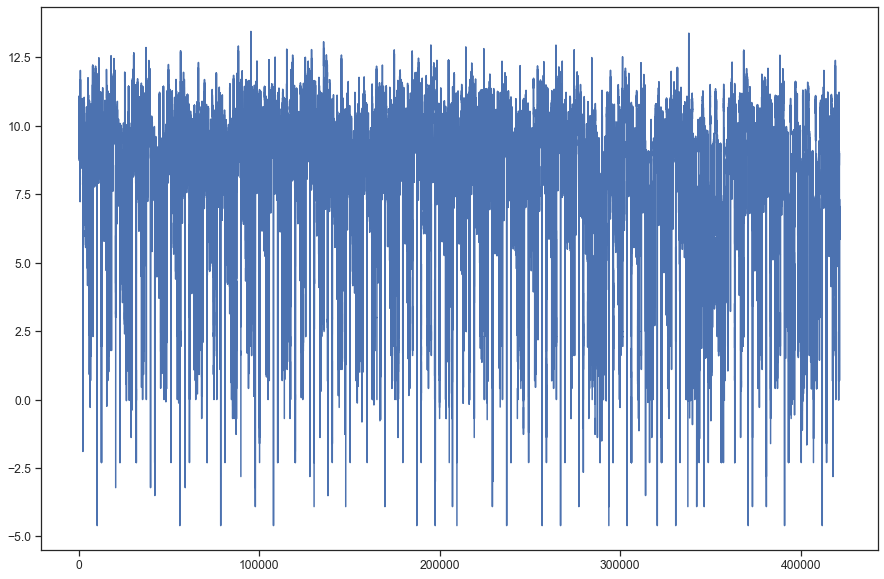

In [133]:
# plt.figure(dpi=65)
# sns.distplot()
np.log(train['Weekly_Sales']).plot()

In [120]:
train.Weekly_Sales.value_counts().reset_index().sort_values(by = 'index', ascending = False).head(205)

,index,Weekly_Sales
107110,693099.36,1
284433,649770.18,1
191551,630999.19,1
266489,627962.93,1
349117,474330.10,1
...,...,...
59227,194032.48,1
59311,194003.48,1
328395,193531.53,1
187357,192860.85,1


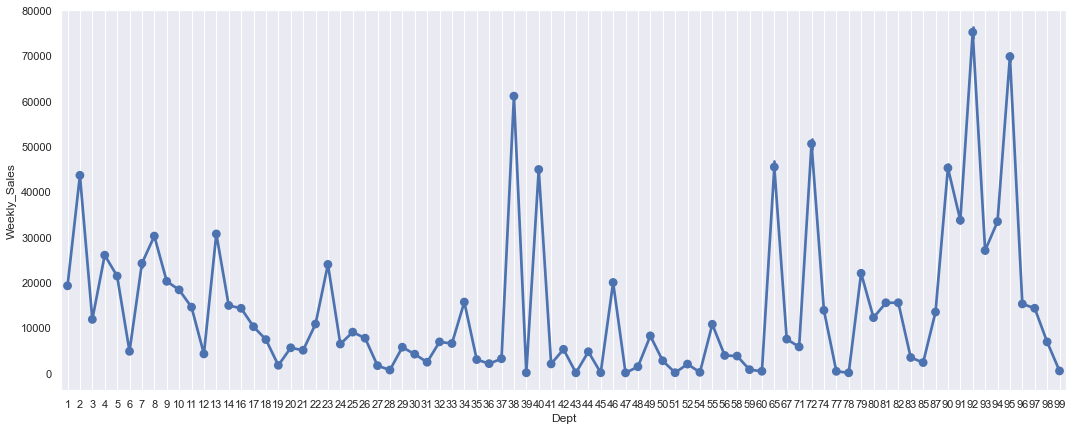

In [138]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,7)})
sns.pointplot(x='Dept', y='Weekly_Sales',data=train)
plt.grid()

In [141]:
train.head(3)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106


In [154]:
train[train['Weekly_Sales'] < 0]

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
846,1,A,151315,6,2012-08-10,-139.65,False,29.472222,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908
2384,1,A,151315,18,2012-05-04,-1.27,False,24.194444,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143
6048,1,A,151315,47,2010-02-19,-863.00,False,4.405556,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106
6049,1,A,151315,47,2010-03-12,-698.00,False,14.327778,2.667,0.00,0.0,0.00,0.00,0.00,211.380643,8.106
6051,1,A,151315,47,2010-10-08,-58.00,False,17.738889,2.633,0.00,0.0,0.00,0.00,0.00,211.746754,7.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,B,118221,80,2010-02-12,-0.43,True,-2.372222,2.773,0.00,0.0,0.00,0.00,0.00,181.982317,8.992
419598,45,B,118221,80,2010-02-19,-0.27,False,-0.405556,2.745,0.00,0.0,0.00,0.00,0.00,182.034782,8.992
419603,45,B,118221,80,2010-04-16,-1.61,False,12.377778,2.899,0.00,0.0,0.00,0.00,0.00,181.692477,8.899
419614,45,B,118221,80,2010-07-02,-0.27,False,24.783333,2.815,0.00,0.0,0.00,0.00,0.00,182.318780,8.743


In [151]:
# changing temperaturefherantite to celsius

train['Temperature'] = (train['Temperature'] - 32) * 5/9
test['Temperature'] = (test['Temperature'] - 32) * 5/9

In [153]:

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [156]:

#### Extracting date features
train["Date"]=pd.to_datetime(train["Date"])
train["Day"]=train['Date'].dt.day
train["Week"]=train['Date'].dt.week
train["Month"]=train['Date'].dt.month
train["Year"]=train['Date'].dt.year

test["Day"]=test['Date'].dt.day
test["Week"]=test['Date'].dt.week
test["Month"]=test['Date'].dt.month
test["Year"]=test['Date'].dt.year

<ipython-input-156-cbd05687efcb>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train["Week"]=train['Date'].dt.week
<ipython-input-156-cbd05687efcb>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test["Week"]=test['Date'].dt.week


In [159]:
train.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year
421565,45,B,118221,98,2012-09-28,508.37,False,18.266667,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,39,9,2012
421566,45,B,118221,98,2012-10-05,628.10,False,18.272222,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,5,40,10,2012
421567,45,B,118221,98,2012-10-12,1061.02,False,12.483333,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,12,41,10,2012
421568,45,B,118221,98,2012-10-19,760.01,False,13.594444,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,19,42,10,2012
421569,45,B,118221,98,2012-10-26,1076.80,False,14.916667,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,26,43,10,2012


In [160]:
#SUPERBOWL DATES
s_1=np.datetime64('2010-02-12')
s_2=np.datetime64('2011-02-11')
s_3=np.datetime64('2012-02-10')
s_4=np.datetime64('2013-02-08')

#labor day
l_1=np.datetime64('2010-09-10')
l_2=np.datetime64('2011-09-09')
l_3=np.datetime64('2012-09-07')
l_4=np.datetime64('2013-09-06')

#thanksgiving
t_1=np.datetime64('2010-11-26')
t_2=np.datetime64('2011-11-25')
t_3=np.datetime64('2012-11-23')
t_4=np.datetime64('2013-11-29')

#christams day
c_1=np.datetime64('2010-12-31')
c_2=np.datetime64('2011-12-30')
c_3=np.datetime64('2012-12-28')
c_4=np.datetime64('2013-12-27')

In [161]:
#Creating new variables on train data

train['Superbowl']=np.where(((train.Date==s_1) | (train.Date==s_2) |
                                  (train.Date==s_3) | (train.Date==s_4)),1,0)

train['labor']= np.where(((train.Date==l_1) | (train.Date==l_2) |
                                  (train.Date==l_3) | (train.Date==l_4)),1,0)

train['thanksgiving']=np.where(((train.Date==t_1) | (train.Date==t_2) |
                                  (train.Date==t_3) | (train.Date==t_4)),1,0)

train['christmas']=np.where(((train.Date==c_1) | (train.Date==c_2) |
                             (train.Date==c_3) | (train.Date==c_4)),1,0)

train.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,A,151315,1,2010-02-05,24924.50,False,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
1,1,A,151315,1,2010-02-12,46039.49,True,3.616667,2.548,0.0,...,211.242170,8.106,12,6,2,2010,1,0,0,0
2,1,A,151315,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,...,211.289143,8.106,19,7,2,2010,0,0,0,0
3,1,A,151315,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,...,211.319643,8.106,26,8,2,2010,0,0,0,0
4,1,A,151315,1,2010-03-05,21827.90,False,8.055556,2.625,0.0,...,211.350143,8.106,5,9,3,2010,0,0,0,0


In [162]:
#Creating new variables on test data
test['Superbowl']=np.where(((test.Date==s_1) | (test.Date==s_2) |
                                  (test.Date==s_3) | (test.Date==s_4)),1,0)

test['labor']= np.where(((test.Date==l_1) | (test.Date==l_2) |
                                  (test.Date==l_3) | (test.Date==l_4)),1,0)

test['thanksgiving']=np.where(((test.Date==t_1) | (test.Date==t_2) |
                                  (test.Date==t_3) | (test.Date==t_4)),1,0)

test['christmas']=np.where(((test.Date==c_1) | (test.Date==c_2) |
                             (test.Date==c_3) | (test.Date==c_4)),1,0)

In [163]:
#converting IsHoliday variables from true/false to 1/0 on train data
train['IsHoliday']=np.where((train.IsHoliday==True),1,0)

test['IsHoliday']=np.where((test.IsHoliday==True),1,0)

In [166]:
train.dtypes

Store                    int64
Type                    object
Size                     int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int32
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Day                      int64
Week                     int64
Month                    int64
Year                     int64
Superbowl                int32
labor                    int32
thanksgiving             int32
christmas                int32
dtype: object

In [167]:
train['IsHoliday']|train['Superbowl']|train['labor']|train['thanksgiving']|train['christmas']

0         0
1         1
2         0
3         0
4         0
         ..
421565    0
421566    0
421567    0
421568    0
421569    0
Length: 421570, dtype: int32

In [168]:
train.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,A,151315,1,2010-02-05,24924.50,0,5.727778,2.572,0.0,...,211.096358,8.106,5,5,2,2010,0,0,0,0
1,1,A,151315,1,2010-02-12,46039.49,1,3.616667,2.548,0.0,...,211.242170,8.106,12,6,2,2010,1,0,0,0
2,1,A,151315,1,2010-02-19,41595.55,0,4.405556,2.514,0.0,...,211.289143,8.106,19,7,2,2010,0,0,0,0
3,1,A,151315,1,2010-02-26,19403.54,0,8.127778,2.561,0.0,...,211.319643,8.106,26,8,2,2010,0,0,0,0
4,1,A,151315,1,2010-03-05,21827.90,0,8.055556,2.625,0.0,...,211.350143,8.106,5,9,3,2010,0,0,0,0


In [170]:
# outlier identification

train[train['Weekly_Sales'] > 150000]

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
904,1,A,151315,7,2010-12-24,166697.72,0,11.294444,2.886,0.00,...,211.405122,7.838,24,51,12,2010,0,0,0,0
7689,1,A,151315,72,2010-11-26,196810.42,1,18.066667,2.735,0.00,...,211.748433,7.838,26,47,11,2010,0,0,1,0
7741,1,A,151315,72,2011-11-25,203670.47,1,15.633333,3.236,410.31,...,218.467621,7.866,25,47,11,2011,0,0,1,0
9268,1,A,151315,92,2010-11-19,157621.22,0,10.783333,2.771,0.00,...,211.889674,7.838,19,46,11,2010,0,0,0,0
9269,1,A,151315,92,2010-11-26,170904.79,1,18.066667,2.735,0.00,...,211.748433,7.838,26,47,11,2010,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390112,41,A,196321,92,2011-12-09,150744.01,0,-8.305556,3.331,2782.39,...,195.874257,6.759,9,49,12,2011,0,0,0,0
390114,41,A,196321,92,2011-12-23,177637.80,0,-3.561111,3.173,1284.19,...,196.171389,6.759,23,51,12,2011,0,0,0,0
412837,45,B,118221,7,2010-12-24,166757.11,0,-0.783333,3.141,0.00,...,182.544590,8.724,24,51,12,2010,0,0,0,0
419193,45,B,118221,72,2010-11-26,240758.86,1,7.861111,3.039,0.00,...,182.783277,8.724,26,47,11,2010,0,0,1,0


C:\Users\tejan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

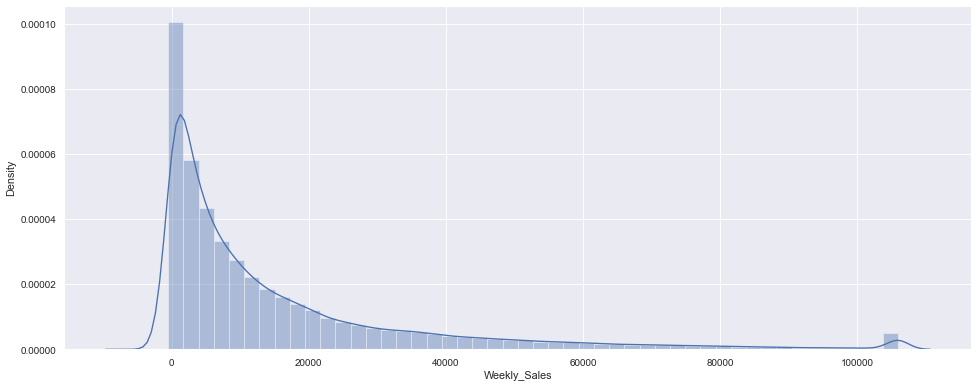

In [175]:
plt.figure(dpi=65)
sns.distplot(train.Weekly_Sales)


In [174]:
train['Weekly_Sales'] = np.where(train['Weekly_Sales']>106000,106000,train['Weekly_Sales'])

In [178]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [181]:
train

,Store,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Week,Month,Year,Superbowl,labor,thanksgiving,christmas,Type_A,Type_B,Type_C
0,1,151315,1,2010-02-05,24924.50,0,5.727778,2.572,0.00,0.00,...,5,2,2010,0,0,0,0,1,0,0
1,1,151315,1,2010-02-12,46039.49,1,3.616667,2.548,0.00,0.00,...,6,2,2010,1,0,0,0,1,0,0
2,1,151315,1,2010-02-19,41595.55,0,4.405556,2.514,0.00,0.00,...,7,2,2010,0,0,0,0,1,0,0
3,1,151315,1,2010-02-26,19403.54,0,8.127778,2.561,0.00,0.00,...,8,2,2010,0,0,0,0,1,0,0
4,1,151315,1,2010-03-05,21827.90,0,8.055556,2.625,0.00,0.00,...,9,3,2010,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,118221,98,2012-09-28,508.37,0,18.266667,3.997,4556.61,20.64,...,39,9,2012,0,0,0,0,0,1,0
421566,45,118221,98,2012-10-05,628.10,0,18.272222,3.985,5046.74,0.00,...,40,10,2012,0,0,0,0,0,1,0
421567,45,118221,98,2012-10-12,1061.02,0,12.483333,4.000,1956.28,0.00,...,41,10,2012,0,0,0,0,0,1,0
421568,45,118221,98,2012-10-19,760.01,0,13.594444,3.969,2004.02,0.00,...,42,10,2012,0,0,0,0,0,1,0


In [199]:

train['IsHoliday']=train['IsHoliday']|train['Superbowl']|train['labor']|train['thanksgiving']|train['christmas']
test['IsHoliday']=test['IsHoliday']|test['Superbowl']|test['labor']|test['thanksgiving']|test['christmas']

In [202]:
# dropping variables
dplist=['Superbowl', 'labor', 'thanksgiving', 'christmas']
train.drop(dplist,inplace=True,axis=1)
test.drop(dplist,inplace=True,axis=1)

<AxesSubplot:>

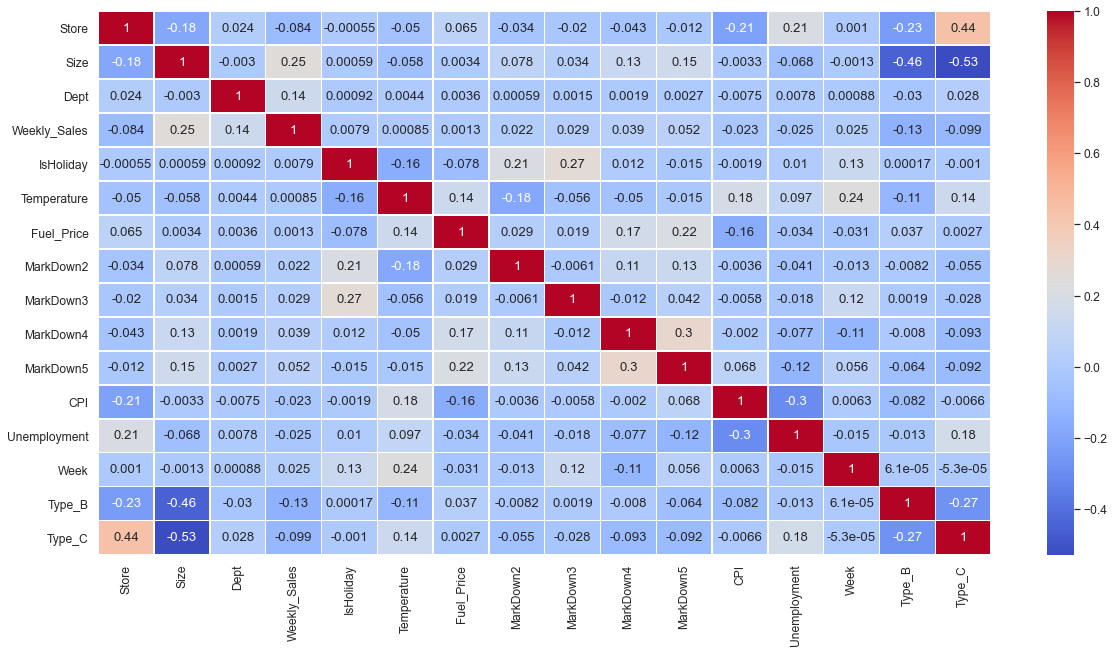

In [209]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(train.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

In [204]:
# # keyobservation from correlation matrix


# 1. Markdown 4 is highly correlated to 1
# 2. Fuel Price is highly correlated to Year (It must be)
# 3. Size and Type are negatively correlated
# 4. 


In [205]:
train.columns

Index(['Store', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Week', 'Month',
       'Year', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

In [206]:
dpcol=['MarkDown1', 'Year' , 'Day', 'Month' ] 
train.drop(dpcol,inplace=True,axis=1)
test.drop(dpcol,inplace=True,axis=1)

In [208]:
train.drop('Type_A',inplace=True,axis=1)
test.drop('Type_A',inplace=True,axis=1)

In [212]:
train.drop('CPI',inplace=True,axis=1)
test.drop('CPI',inplace=True,axis=1)

<AxesSubplot:>

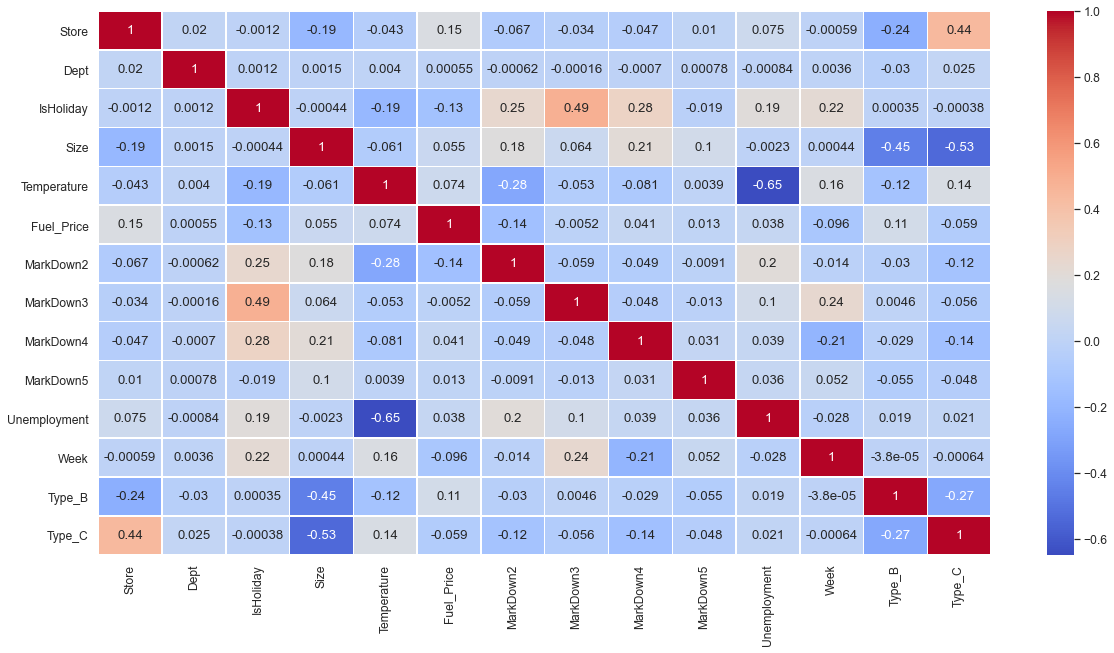

In [213]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(test.corr(),linewidths=0.5,annot=True,cmap='coolwarm')

In [214]:
# train test split

In [215]:
#   train X= Exery thing except Weekly_Sales and Date offcourse
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

#  train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 14), (421570,), (115064, 14))

In [216]:
# builing Regrwssion models

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [218]:
lm = LinearRegression(n_jobs=-1)
lm.fit(train_X,train_y)

LinearRegression(n_jobs=-1)

In [224]:

y_pred =lm.predict(test_X)
acc_lm = round(lm.score(train_X,train_y)* 100,2)
print('Accuracy of Linear Regression model: ' +str(acc_lm)+'%')

Accuracy of Linear Regression model: 9.07%


In [225]:
# random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

In [226]:
param_grid={'n_estimators': [20, 30, 40, 50], 'max_features': [5,6,7,8,9,10]
           }
tree=GridSearchCV(RandomForestRegressor(oob_score=False),param_grid,cv=2,n_jobs=-1, verbose=True)
tree.fit(train_X,train_y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  6.4min finished


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [20, 30, 40, 50]},
             verbose=True)

In [227]:
tree.best_params_

{'max_features': 7, 'n_estimators': 20}

In [228]:
clf_rf = RandomForestRegressor(n_estimators=20, max_features = 7, n_jobs=-1, verbose=5)
clf_rf.fit(train_X,train_y)
y_pred_rf = clf_rf.predict(test_X)
acc_rf = round(clf_rf.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest model: '+str(acc_rf) +'%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 20building tree 2 of 20building tree 3 of 20

building tree 4 of 20
building tree 5 of 20building tree 6 of 20
building tree 7 of 20


building tree 8 of 20
building tree 9 of 20


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s


building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20


[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    4.2s remaining:    4.2s


building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    4.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  15 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s


Accuracy of Random Forest model: 99.52%


[Parallel(n_jobs=8)]: Done  10 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.2s finished


In [232]:
submission = pd.DataFrame({
    'Store_Dept_Date': test.Store.astype(str)+'_'+ test.Dept.astype(str)+'_'+test.Date.astype(str),
    'Weekly_Sales_dt': y_pred_dt , 'Weekly_sales_rf' : y_pred_rf})
# submission.to_csv('weekly_sales Predicted.csv',index=False)
submission

,Store_Dept_Date,Weekly_Sales_dt,Weekly_sales_rf
0,1_1_2012-11-02,18969.05,11255.4885
1,1_1_2012-11-09,18969.05,11379.7030
2,1_1_2012-11-16,9251.40,12611.5375
3,1_1_2012-11-23,9251.40,13855.1950
4,1_1_2012-11-30,9251.40,15409.0210
...,...,...,...
115059,45_98_2013-06-28,2103.08,10004.4185
115060,45_98_2013-07-05,2103.08,9821.4475
115061,45_98_2013-07-12,2103.08,9452.5975
115062,45_98_2013-07-19,2798.50,8830.7355


In [233]:
submission.sort_values('Weekly_sales_rf')

,Store_Dept_Date,Weekly_Sales_dt,Weekly_sales_rf
93023,36_12_2013-02-01,2138.36,3358.063
92718,36_3_2013-02-01,2138.36,3358.063
94278,36_97_2013-02-01,2138.36,3358.063
92906,36_9_2013-02-01,2138.36,3358.063
93520,36_40_2013-02-01,2138.36,3358.063
...,...,...,...
43033,17_4_2012-12-21,10107.45,24063.298
44352,17_41_2012-12-21,10107.45,24063.298
42994,17_3_2012-12-21,10107.45,24063.298
45157,17_83_2012-12-21,10107.45,24063.298


In [239]:
train[(train['Store']== 36) & (train['Dept']== 40) ]

,Store,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Week,Type_B,Type_C
343237,36,39910,40,2010-02-05,12108.45,0,7.761111,2.545,0.00,0.0,0.0,0.00,8.554,5,0,0
343238,36,39910,40,2010-02-12,11745.52,1,7.838889,2.539,0.00,0.0,0.0,0.00,8.554,6,0,0
343239,36,39910,40,2010-02-19,12080.58,0,7.588889,2.472,0.00,0.0,0.0,0.00,8.554,7,0,0
343240,36,39910,40,2010-02-26,11594.10,0,10.483333,2.520,0.00,0.0,0.0,0.00,8.554,8,0,0
343241,36,39910,40,2010-03-05,11814.63,0,10.738889,2.574,0.00,0.0,0.0,0.00,8.554,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343375,36,39910,40,2012-09-28,10254.97,0,26.383333,3.660,0.00,0.0,0.0,1939.92,6.623,39,0,0
343376,36,39910,40,2012-10-05,10541.33,0,23.094444,3.611,0.00,0.0,0.0,1007.44,6.228,40,0,0
343377,36,39910,40,2012-10-12,11387.37,0,21.822222,3.576,0.00,0.0,0.0,1312.73,6.228,41,0,0
343378,36,39910,40,2012-10-19,10373.71,0,23.366667,3.570,0.00,0.0,0.0,632.10,6.228,42,0,0


In [230]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(train_X,train_y)
y_pred_dt = reg.predict(test_X)
acc_dt = round(reg.score(train_X,train_y)*100,2)
print("Accuracy of Decision Tree Model: "+str(acc_dt)+'%')

Accuracy of Decision Tree Model: 100.0%
